<a href="https://colab.research.google.com/github/10udCryp7/VAD-flow/blob/main/notebooks/VAD_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...


In [1]:
!conda install textgrid

Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - textgrid


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.7.14  |       hbd8a1cb_0         152 KB  conda-forge
    certifi-2025.7.14          |     pyhd8ed1ab_0         156 KB  conda-forge
    conda-24.11.3              |  py311h38be061_0         1.1 MB  conda-forge
    openssl-3.5.1              |       h7b32b05_0         3.0 MB  conda-forge
    textgrid-1.5               |     pyhd8ed1ab_0          12 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.4 MB

The following NEW packages will be INSTALLED:

  textgrid           conda-forge/noarch::textgrid-1.5-pyhd8ed1ab_0 

The following packages will be UPDATED

# Annotation Preparation

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lazyrac00n/speech-activity-detection-datasets")

print("Path to dataset files:", path)

100%|██████████| 138M/138M [00:00<00:00, 160MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lazyrac00n/speech-activity-detection-datasets/versions/1


In [3]:
dir = '/root/.cache/kagglehub/datasets/lazyrac00n/speech-activity-detection-datasets/versions/1/Data'

In [ ]:
'''
TODO:
- Text grid to Dataframe
'''

In [4]:



import os
import pandas as pd
from textgrid import TextGrid

data = []
list_dir = []

for dirname, _, filenames in os.walk(f'{dir}/Annotation'):
    for filename in filenames:
        if not filename.endswith('.TextGrid'):
            continue

        tg_path = os.path.join(dirname, filename)
        tg = TextGrid.fromFile(tg_path)

        for interval in tg[0]:
            data.append({
                'name': filename.replace('.TextGrid', ''),
                'mark': interval.mark,
                'start': interval.minTime,
                'end': interval.maxTime,
                'tg_path': tg_path,
            })

df = pd.DataFrame(data)

In [5]:
df['audio_path'] = df['tg_path'].str.replace('/Annotation/', '/Audio/', regex=False).str.replace('.TextGrid', '.wav', regex=False)

In [6]:
df

,name,mark,start,end,tg_path,audio_path
0,sp06_restaurant_sn5,0,0.00000,0.16256,/root/.cache/kagglehub/datasets/lazyrac00n/spe...,/root/.cache/kagglehub/datasets/lazyrac00n/spe...
1,sp06_restaurant_sn5,1,0.16256,0.36256,/root/.cache/kagglehub/datasets/lazyrac00n/spe...,/root/.cache/kagglehub/datasets/lazyrac00n/spe...
2,sp06_restaurant_sn5,0,0.36256,0.49856,/root/.cache/kagglehub/datasets/lazyrac00n/spe...,/root/.cache/kagglehub/datasets/lazyrac00n/spe...
3,sp06_restaurant_sn5,1,0.49856,0.97056,/root/.cache/kagglehub/datasets/lazyrac00n/spe...,/root/.cache/kagglehub/datasets/lazyrac00n/spe...
4,sp06_restaurant_sn5,0,0.97056,1.41056,/root/.cache/kagglehub/datasets/lazyrac00n/spe...,/root/.cache/kagglehub/datasets/lazyrac00n/spe...
...,...,...,...,...,...,...
5705,mic_M05_si1216,0,3.77700,3.88900,/root/.cache/kagglehub/datasets/lazyrac00n/spe...,/root/.cache/kagglehub/datasets/lazyrac00n/spe...
5706,mic_M05_si1216,1,3.88900,4.03300,/root/.cache/kagglehub/datasets/lazyrac00n/spe...,/root/.cache/kagglehub/datasets/lazyrac00n/spe...
5707,mic_M05_si1216,0,4.03300,4.26500,/root/.cache/kagglehub/datasets/lazyrac00n/spe...,/root/.cache/kagglehub/datasets/lazyrac00n/spe...
5708,mic_M05_si1216,1,4.26500,4.75300,/root/.cache/kagglehub/datasets/lazyrac00n/spe...,/root/.cache/kagglehub/datasets/lazyrac00n/spe...


# Dataset Preprocessing

In [11]:
'''
TODO:
- Padding
- Audio Framing

Flow: Padding -> Audio Framing
'''

In [ ]:
# audio framing

import librosa
import librosa.util

audio_sample_dir = df['audio_path'][0]
audio, sr = librosa.load(audio_sample_dir, sr=16000)

frame_dur = 0.025
frame_length = int(frame_dur * sr)

hop_dur = 0.01
hop_length = int(hop_dur * sr)
frames = librosa.util.frame(audio, frame_length=frame_length, hop_length=hop_length)
frames = frames.T


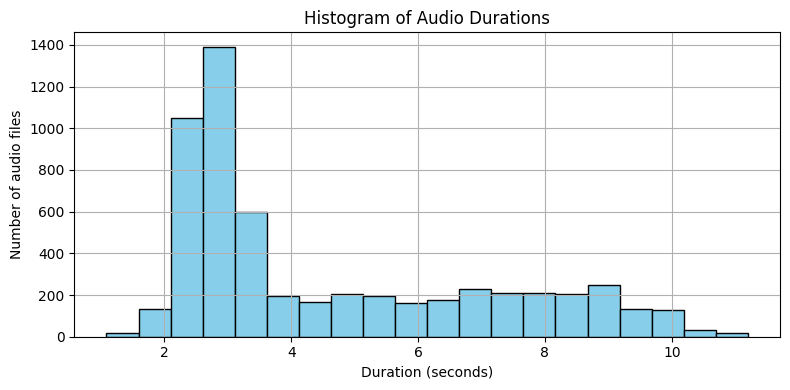

In [14]:
# duration

import librosa
import matplotlib.pyplot as plt
duration_list = []
for audio_path in df['audio_path']:
    audio, sr = librosa.load(audio_path, sr=16000)
    duration = librosa.get_duration(y=audio, sr=sr)
    duration_list.append(duration)

# histogram

plt.figure(figsize=(8, 4))
plt.hist(duration_list, bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Audio Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Number of audio files")
plt.grid(True)
plt.tight_layout()
plt.show()



In [16]:
print(max(duration_list))

11.2


In [35]:
import kagglehub
import os
import pandas as pd
from textgrid import TextGrid
import librosa
import torch

def download_data() -> str:

    # Download latest version
    path = kagglehub.dataset_download("lazyrac00n/speech-activity-detection-datasets")

    return path

def build_dataframe(data_dir: str) -> pd.DataFrame:
    data = []
    list_dir = []

    for dirname, _, filenames in os.walk(f'{data_dir}/Annotation'):
        for filename in filenames:
            if not filename.endswith('.TextGrid'):
                continue

            tg_path = os.path.join(dirname, filename)
            tg = TextGrid.fromFile(tg_path)

            for interval in tg[0]:
                data.append({
                    'name': filename.replace('.TextGrid', ''),
                    'mark': interval.mark,
                    'start': interval.minTime,
                    'end': interval.maxTime,
                    'tg_path': tg_path,
                })

    df = pd.DataFrame(data)
    df['audio_path'] = df['tg_path'].str.replace('/Annotation/', '/Audio/', regex=False).str.replace('.TextGrid', '.wav', regex=False)
    df['duration'] = df['audio_path'].apply(lambda x: librosa.get_duration(filename=x))
    return df

def padding(audio, sr, max_length):
  audio = librosa.util.fix_length(audio, size = max_length * sr)
  return audio

def get_frames(audio, sr, frame_dur = 0.025, hop_dur = 0.01):
  frame_dur = frame_dur
  frame_length = int(frame_dur * sr)

  hop_dur = hop_dur
  hop_length = int(hop_dur * sr)
  frames = librosa.util.frame(audio, frame_length=frame_length, hop_length=hop_length)
  frames = frames.T
  return frames # (num_frame, frame_size)


def transform(path, max_length = None):
  audio, sr = librosa.load(path, sr=16000)
  # padding
  if max_length is None:
    max_length = librosa.get_duration(y=audio, sr=sr)
  audio = padding(audio, sr, max_length)
  # framing
  frames = get_frames(audio, sr)
  # to tensor
  tensor = torch.from_numpy(frames)
  return tensor


# tạo được kiểu dữ liệu là frames luôn thì tốt

def get_label(frames, frame_dur, hop_dur, sr, path: str, df: pd.DataFrame, num_overlap: int = 2):
  label = torch.zeros(frames.shape[0])
  df_label = df[df['audio_path'] == path]

  for i in range(len(df_label)):
    mark = df_label.iloc[i]['mark']
    if mark == '1':
      start = df_label.iloc[i]['start']
      end = df_label.iloc[i]['end']

      frame_start = round((start - frame_dur)/hop_dur) - num_overlap
      frame_end = round(end/hop_dur) + num_overlap

      if frame_start < 0:
        frame_start = 0

      if frame_end > frames.shape[0]:
        frame_end = frames.shape[0]

      label[frame_start:frame_end] = 1
    else:
      continue

  return label


In [36]:
# Test

path_test = df['audio_path'][0]
audio, sr = librosa.load(path_test, sr=16000)

frames = transform(path_test)
print(frames.shape)

label = get_label(frames, frame_dur = 0.025, hop_dur = 0.01, sr = 16000, path = path_test, df = df)
print(label.shape)

torch.Size([271, 400])
torch.Size([271])


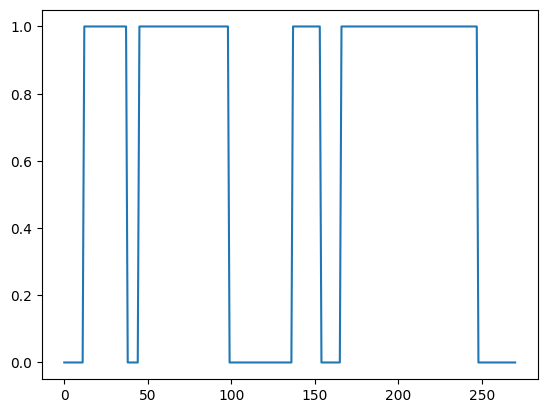

In [37]:
plt.plot(label)

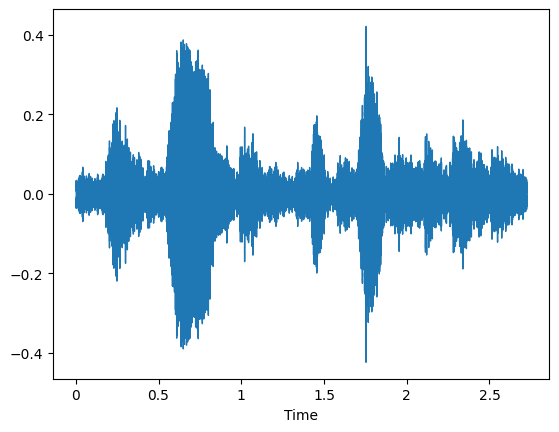

In [38]:
librosa.display.waveshow(audio, sr=sr)
plt.show()

In [ ]:
from torch.utils.data import Dataset

class AudioDataset(Dataset):
  def __init__(self, df: pd.DataFrame, transform = None):
    self.df = df
    self.transform = transform

  def __len__(self):
    return len(self.df)

  def __getitem__(self, idx):
    df_path = df['audio_path'].drop_duplicates().reset_index(drop=True)
    row = self.df_path.iloc[idx]
    waveform, sr = torchaudio.load(row["audio_path"])

    if self.transform:
      waveform = self.transform(waveform)

    return waveform,



In [21]:
df_path = df['audio_path'].drop_duplicates().reset_index(drop=True)

In [22]:
df_path

,audio_path
0,/root/.cache/kagglehub/datasets/lazyrac00n/spe...
1,/root/.cache/kagglehub/datasets/lazyrac00n/spe...
2,/root/.cache/kagglehub/datasets/lazyrac00n/spe...
3,/root/.cache/kagglehub/datasets/lazyrac00n/spe...
4,/root/.cache/kagglehub/datasets/lazyrac00n/spe...
...,...
714,/root/.cache/kagglehub/datasets/lazyrac00n/spe...
715,/root/.cache/kagglehub/datasets/lazyrac00n/spe...
716,/root/.cache/kagglehub/datasets/lazyrac00n/spe...
717,/root/.cache/kagglehub/datasets/lazyrac00n/spe...


# Model